# RNN: Time Series Prediction and Sentiment Analysis

Thank you so much professor (https://www.utsc.utoronto.ca/cms/sotirios-damouras) and TA (Sharique Pervaiz) for preparing this fantastic worksheets !


# 1. Time Series Prediction - RNN (univariate)

Implement an RNN for (univariate) time series prediction, i.e. where the input and output are 1D numerical values. The code below downloads and plots the classic [Air Passengers](https://www.kaggle.com/datasets/brmil07/air-passengers-dataset) dataset, the monthly total of US airline passengers from 1949 to 1960.

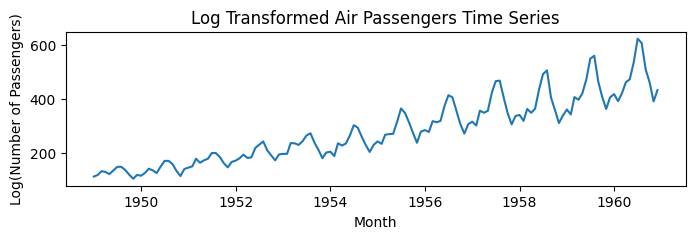

In [1]:
import numpy as np; import pandas as pd; import matplotlib.pyplot as plt

# Download the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

# Convert the 'Month' column to datetime objects
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' as the index
df.set_index('Month', inplace=True)

# Visualize the time series
plt.figure(figsize=(8, 2)); plt.plot(df['Passengers']); plt.title('Log Transformed Air Passengers Time Series')
plt.xlabel('Month');plt.ylabel('Log(Number of Passengers)');plt.show()


Since the data have exponential growth, you will model their log-transformation. The desired output for our model is the next value of the series, so we create the relevant input ($x$) and output ($y$) vectors.

In [2]:
data = np.log ( df['Passengers'].values.astype('float32').reshape(-1, 1) )
x = data[:-1]
y = data[1:]

train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Define and train the RNN model described below.
This is an RNN with two LSTM layers stacked on top of each other. Note that in order to stack layers, the lower one has to return an entire sequence (use parameter `return_sequences=True`). Moreover, use the ReLU activation function for both layers (parameter `activation = 'relu'`). Finally, uses a dense layer with 1D output, and train the model for 5 epochs with the `'mse'` loss function.
Apply the trained model on the entire input sequence, plot the real and fitted values, and calculate the MSE on the test set outputs.

```
Model: "Air_Passenger_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 lstm_1 (LSTM)               (None, 114, 5)            140       
                                                                 
 lstm_2 (LSTM)               (None, 5)                 220       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
=================================================================
Total params: 366
Trainable params: 366
Non-trainable params: 0
```

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Build the LSTM model
model = Sequential( name = "Air_Passenger_RNN")
#model.add(SimpleRNN(50, activation='relu', input_shape=x_train.shape))
model.add(LSTM(5, activation='relu', input_shape=x_train.shape, return_sequences=True)) # added return sequences
model.add(LSTM(5, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse')

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Air_Passenger_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 114, 5)              │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 5)                   │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 366 (1.43 KB)

 Trainable params: 366 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 535ms/step - loss: 28.7242
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 28.6422
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 28.4414 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 28.2856
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 28.1356


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step


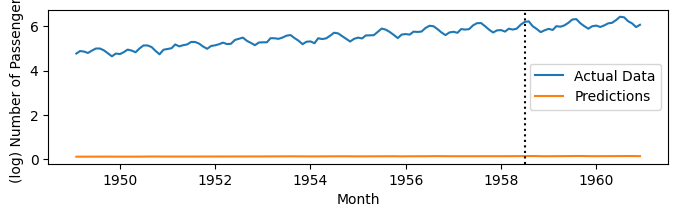

Mean Squared Error (MSE) on test data: 35.23473358154297
Mean Squared Error (MSE) of last value: 0.013303919695317745


In [5]:
# Make predictions
predict = model.predict( x ) # this will use all sequence data to make predictions
# the values to the right of the vertical line are the out-of-sample predictions

plt.figure(figsize=(8, 2))
plt.plot(df.index[1:], y, label='Actual Data')
plt.plot(df.index[1:], predict, label='Predictions')
plt.axvline(x = df.index[train_size], linestyle = ":", c="k")
plt.xlabel('Month')
plt.ylabel('(log) Number of Passengers')
plt.legend()
plt.show()

# Calculate MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predict[train_size:])
print(f"Mean Squared Error (MSE) on test data: {mse}")

## The RNN model seems to predict the last value, adjusted for growth
## Actually the last value is better in terms of MSE
print(f"Mean Squared Error (MSE) of last value: {mean_squared_error(y_test, y[(train_size-1):-1])}")


# 2. Sentiment Analysis with an RNN

In this notebook, you'll implement a recurrent neural network that performs sentiment analysis. This is an example of seq2vec application.
>Using an RNN rather than a strictly feedforward network is more accurate since we can include information about the *sequence* of words.

Here we'll use a dataset of movie reviews, accompanied by sentiment labels: positive or negative.

<img src="https://github.com/agungsantoso/deep-learning-v2-pytorch/blob/master/sentiment-rnn/assets/reviews_ex.png?raw=1" width=40%>

### Network Architecture

The architecture for this network is shown below.

<img src="https://github.com/agungsantoso/deep-learning-v2-pytorch/blob/master/sentiment-rnn/assets/network_diagram.png?raw=1" width=40%>


>**First, we'll pass in words to an embedding layer.** We need an embedding layer because we have tens of thousands of words, so we'll need a more efficient representation for our input data than one-hot encoded vectors. You can actually train an embedding with the Skip-gram Word2Vec model and use those embeddings as input, here. However, it's good enough to just have an embedding layer and let the network learn a different embedding table on its own. *In this case, the embedding layer is for dimensionality reduction, rather than for learning semantic representations.*

>**After input words are passed to an embedding layer, the new embeddings will be passed to LSTM cells.** The LSTM cells will add *recurrent* connections to the network and give us the ability to include information about the *sequence* of words in the movie review data.

>**Finally, the LSTM outputs will go to a sigmoid output layer.** We're using a sigmoid function because positive and negative = 1 and 0, respectively, and a sigmoid will output predicted, sentiment values between 0-1.

We don't care about the sigmoid outputs except for the **very last one**; we can ignore the rest. We'll calculate the loss by comparing the output at the last time step and the training label (pos or neg).

---
### Load in and visualize the data

In [6]:
import tensorflow as tf; import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from collections import Counter

In [7]:
!mkdir -p data > /dev/null 2>&1
!wget -q -c https://github.com/agungsantoso/deep-learning-v2-pytorch/raw/master/sentiment-rnn/data/labels.txt
!wget -q -c https://github.com/agungsantoso/deep-learning-v2-pytorch/raw/master/sentiment-rnn/data/reviews.txt
!mv *.txt data/ > /dev/null 2>&1
print("Download complete !")

Download complete !


In [8]:
with open('data/reviews.txt', 'r') as f: reviews = f.read()
with open('data/labels.txt', 'r') as f: labels = f.read()

In [9]:
print(reviews.split("\n")[:1]);print()
print(labels.split("\n")[:1])

['bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   ']

['positive']


## 2.1. Data Pre-processing

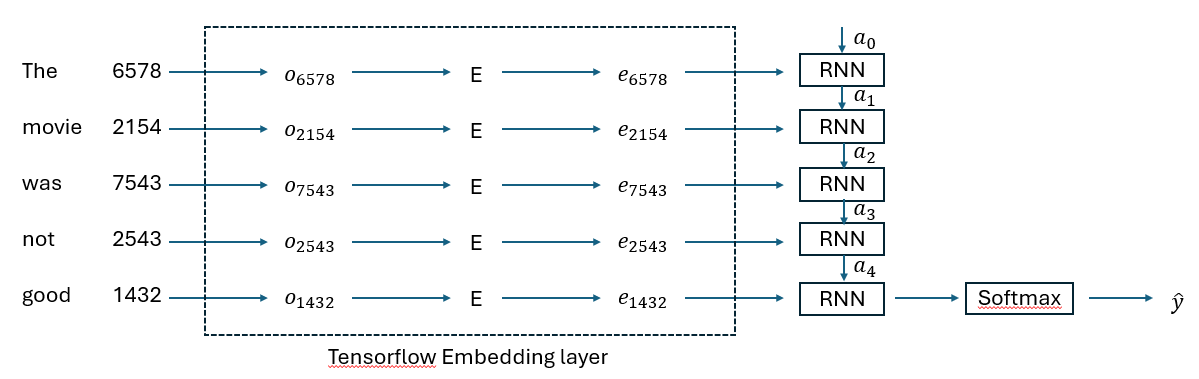

The first step when building a neural network model is getting your data into the proper form to feed into the network. Since we're using embedding layers, we'll need to encode each word with an integer (look up to get an idea of how embedding layer works). We'll also want to clean it up a bit.

You can see an example of the reviews data above. Here are the processing steps, we'll want to take:
>* We'll want to get rid of periods and extraneous punctuation.
* We then convert all the text to unique integers

First, let's remove all punctuation.

In [10]:
from string import punctuation
reviews = reviews.lower()
all_text = ''.join([c for c in reviews if c not in punctuation])

### 2.1.1.Encoding the words


The embedding layer requires that we pass in integers to our network. The easiest way to do this is to use `Tokenizer()` and fit it to the reviews in the dataset

> Now we are going to encode the words with integers.


In [11]:
reviews_split = all_text.split('\n')

# Tokenize words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews_split)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(reviews_split)

**Test your code**

As a text that you've implemented the dictionary correctly, print out the number of unique words in your vocabulary and the contents of the first, tokenized review.

In [12]:
# stats about vocabulary
print('Unique words: ', len((tokenizer.word_index)))  # should ~ 74000+

# print tokens in first review
print();print('Tokenized review: \n', sequences[:1])

Unique words:  74072

Tokenized review: 
 [[21025, 308, 6, 3, 1050, 207, 8, 2138, 32, 1, 171, 57, 15, 49, 81, 5785, 44, 382, 110, 140, 15, 5194, 60, 154, 9, 1, 4975, 5852, 475, 71, 5, 260, 12, 21025, 308, 13, 1978, 6, 74, 2395, 5, 613, 73, 6, 5194, 1, 24103, 5, 1983, 10166, 1, 5786, 1499, 36, 51, 66, 204, 145, 67, 1199, 5194, 19869, 1, 37442, 4, 1, 221, 883, 31, 2988, 71, 4, 1, 5787, 10, 686, 2, 67, 1499, 54, 10, 216, 1, 383, 9, 62, 3, 1406, 3686, 783, 5, 3483, 180, 1, 382, 10, 1212, 13583, 32, 308, 3, 349, 341, 2913, 10, 143, 127, 5, 7690, 30, 4, 129, 5194, 1406, 2326, 5, 21025, 308, 10, 528, 12, 109, 1448, 4, 60, 543, 102, 12, 21025, 308, 6, 227, 4146, 48, 3, 2211, 12, 8, 215, 23]]


Now we will convert the labels string into an array of 0 (negative) and 1 (positive)

In [13]:
# 1=positive, 0=negative label conversion
labels_split = labels.split('\n')
encoded_labels = np.array([1 if label == 'positive' else 0 for label in labels_split])

### 2.1.2. Removing Outliers

As an additional pre-processing step, we want to make sure that our reviews are in good shape for standard processing. That is, our network will expect a standard input text size, and so, we'll want to shape our reviews into a specific length. We'll approach this task in two main steps:

1. Getting rid of extremely long or short reviews; the outliers
2. Padding/truncating the remaining data so that we have reviews of the same length.

<img src="https://github.com/agungsantoso/deep-learning-v2-pytorch/blob/master/sentiment-rnn/assets/outliers_padding_ex.png?raw=1" width=40%>

Before we pad our review text, we should check for reviews of extremely short or long lengths; outliers that may mess with our training.

In [14]:
# outlier review stats
review_lens = Counter([len(x) for x in sequences])
print("Zero-length reviews: {}".format(review_lens[0]))
print("Maximum review length: {}".format(max(review_lens)))

Zero-length reviews: 1
Maximum review length: 2514


Okay, a couple issues here. We seem to have one review with zero length. And, the maximum review length is way too many steps for our RNN. We'll have to remove any super short reviews and truncate super long reviews. This removes outliers and should allow our model to train more efficiently.


In [15]:
non_zero_idx = [ii for ii, review in enumerate(sequences) if len(review) != 0]

print("number of sequences before removing zero length review:", len(sequences))
# remove 0-length review with their labels
sequences = [sequences[ii] for ii in non_zero_idx]
encoded_labels = np.array([encoded_labels[ii] for ii in non_zero_idx])

print("number of sequences before after zero length review:", len(sequences))


number of sequences before removing zero length review: 25001
number of sequences before after zero length review: 25000


---
### 2.1.3.Padding sequences

To deal with both short and very long reviews, we'll pad or truncate all our reviews to a specific length. For reviews shorter than some `maxlen`, we'll pad with 0s. For reviews longer than `maxlen`, we can truncate them to the first `maxlen` words. A good `maxlen`, in this case, is 200.

> We will use `pad_sequences()` function that returns an array  that contains the padded data, of a standard size, that we'll pass to the network.
* The data should come from `sequences`, since we want to feed integers to the network.
* Each row should be `maxlen` elements long.
* For reviews shorter than `maxlen` words, **right pad** with 0s using `padding='post'` parameter. That is, if the review is `['best', 'movie', 'ever']`, `[117, 18, 128]` as integers, the row will look like `[117, 18, 128, 0, ..., 0, 0, 0, 0]`.
* For reviews longer than `maxlen`, use only the first `maxlen` words as the feature vector.

As a small example, if the `maxlen=10` and an input review is:
```
[117, 18, 128]
```
The resultant, padded sequence should be:

```
[117, 18, 128, 0, 0, 0, 0, 0, 0, 0]
```


In [16]:
maxlen = 200
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')
print(padded_sequences[:1])

[[21025   308     6     3  1050   207     8  2138    32     1   171    57
     15    49    81  5785    44   382   110   140    15  5194    60   154
      9     1  4975  5852   475    71     5   260    12 21025   308    13
   1978     6    74  2395     5   613    73     6  5194     1 24103     5
   1983 10166     1  5786  1499    36    51    66   204   145    67  1199
   5194 19869     1 37442     4     1   221   883    31  2988    71     4
      1  5787    10   686     2    67  1499    54    10   216     1   383
      9    62     3  1406  3686   783     5  3483   180     1   382    10
   1212 13583    32   308     3   349   341  2913    10   143   127     5
   7690    30     4   129  5194  1406  2326     5 21025   308    10   528
     12   109  1448     4    60   543   102    12 21025   308     6   227
   4146    48     3  2211    12     8   215    23     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0 

We will also split the data into 80% training and 10% validation  and 10% test splits

In [17]:
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)


In [18]:
print("\t\t\tFeatures Shapes:")
print("Train set: \t\t{}".format(X_train.shape),
      "\nValidation set: \t{}".format(X_val.shape),
      "\nTest set: \t\t{}".format(X_test.shape))

			Features Shapes:
Train set: 		(20000, 200) 
Validation set: 	(2500, 200) 
Test set: 		(2500, 200)


---
## 2.2. Model: Sentiment Network with Tensorflow

Below is where you'll define the network.

<img src="https://github.com/agungsantoso/deep-learning-v2-pytorch/blob/master/sentiment-rnn/assets/network_diagram.png?raw=1" width=40%>

The layers are as follows:
1. An embedding layer that converts our word tokens (integers) into embeddings of a specific size.
2. An LSTM layer defined by a hidden_state size
3. A fully-connected output layer that maps the LSTM layer outputs to a desired output_size
4. A sigmoid activation layer which turns all outputs into a value 0-1;

#### The Embedding Layer

We need to add an embedding layer because there are 74000+ words in our vocabulary. It is massively inefficient to one-hot encode that many classes. So, instead of one-hot encoding, we can have an embedding layer and use that layer as a lookup table. You could train an embedding layer using Word2Vec, then load it here. But, it's fine to just make a new layer, using it for only dimensionality reduction, and let the network learn the weights.


#### The LSTM Layer(s)

We'll create an LSTM  to use in our recurrent network, which takes in an hidden_dim and return sequences (boolean to return sequences or just final value)

Most of the time, you're network will have better performance with more layers; between 2-3. Adding more layers allows the network to learn really complex relationships.

We will add dropout between the layers to avoid overfitting


In [19]:
def make_rnn_model(vocab_size, embedding_dim, hidden_dim, output_size):
  # Define the RNN model
  model = Sequential([
      Embedding(vocab_size, embedding_dim, input_length=maxlen),
      LSTM(hidden_dim, return_sequences=True),
      Dropout(0.5),
      LSTM(hidden_dim),
      Dropout(0.3),
      Dense(output_size, activation='sigmoid')
  ])
  return model

### 2.2.1. Instantiate the network

Here, we'll instantiate the network. First up, defining the hyperparameters.

* `vocab_size`: Size of our vocabulary or the range of values for our input, word tokens.
* `output_size`: Size of our desired output; the number of class scores we want to output (pos/neg).
* `embedding_dim`: Number of columns in the embedding lookup table; size of our embeddings.
* `hidden_dim`: Number of units in the hidden layers of our LSTM cells. Usually larger is better performance wise. Common values are 128, 256, 512, etc.


In [20]:
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding

output_size = 1
embedding_dim = 400
hidden_dim = 256

model = make_rnn_model(vocab_size, embedding_dim, hidden_dim, output_size)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


---
### 2.2.2.Training

Below is the typical training function.

>We'll also be using a new kind of cross entropy loss, which is designed to work with a single Sigmoid output. [BCELoss](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy), or **Binary Cross Entropy Loss**, applies cross entropy loss to a single value between 0 and 1.


* `epochs`: Number of times to iterate through the training dataset.
* `batch_size`: length of each division of training data to be passed to the model

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
history = model.fit(X_train, y_train,validation_data=(X_val, y_val),
    epochs=4,batch_size=50,verbose=1)

Epoch 1/4
400/400 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.5084 - loss: 0.6984 - val_accuracy: 0.5260 - val_loss: 0.6868
Epoch 2/4
400/400 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.5919 - loss: 0.6501 - val_accuracy: 0.7604 - val_loss: 0.5202
Epoch 3/4
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.8333 - loss: 0.3917 - val_accuracy: 0.8568 - val_loss: 0.3561
Epoch 4/4
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9423 - loss: 0.1677 - val_accuracy: 0.8704 - val_loss: 0.3411


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (50, 200, 400)              │      29,629,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (50, 200, 256)              │         672,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (50, 200, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (50, 256)                   │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (50, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (50, 1)                     │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,482,613 (352.79 MB)

 Trainable params: 30,827,537 (117.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,655,076 (235.20 MB)

---
### 2.2.3.Testing

Evaluate the model on test set


In [24]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.3529
Test Accuracy: 0.8636


### 2.3.4. Prediction (new examples)

Use your own examples of reviews to check the model performance

In [25]:
def test_model(model, tokenizer, new_texts, maxlen=200):
    sequences = tokenizer.texts_to_sequences(new_texts)
    padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')
    predictions = model.predict(padded_sequences)
    for pred in predictions:
        print(f"Predicted Score: {round(pred.item(),4)}")
        print(f"Predicted Sentiment: {'Positive' if pred > 0.5 else 'Negative'}\n")

In [26]:
test_review_pos = 'This movie had the best acting and the script was so good. I loved it.'
test_review_neg = 'The worst movie I have seen, I want my money back. This movie was terrible and the plot was slow.'
new_texts = [test_review_pos, test_review_neg]

test_model(model, tokenizer, new_texts )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Predicted Score: 0.7067
Predicted Sentiment: Positive

Predicted Score: 0.0166
Predicted Sentiment: Negative

